# Sub Gráficas

En este apartado del tutorial, veremos una de las características mas interesantes de la librería `matplotlib`, como es la capacidad de subdividir un gráfico para incluir más de un subgráfico en la misma visualización.

Esto permite comparar varias gráficas de manera sencilla o presentar varia variables de un vistazo.

In [5]:
import pandas as pd

Emplearemos, como de costumbre los datos de ejemplo de las críticas de vino.

In [6]:
#Se emplea el código de esta celda solo si se está ejecutando el código en Google Collaboratory (se emplea para obtener los datos)
#En caso de estar ejecutando el código en un equipo local, no es necesario volver a descargar los datos

#  ! git clone https://github.com/bbaruque/VisDat_Ejemplos.git
#  data_dir = "./VisDat_Ejemplos/JupyterNotebooks/data/"  

In [7]:
# En caso de haber ejecutado la celda anterior, esta debe dejarse SIN EJECUTAR
data_dir = "../../data/datos_1ªy2ªParte/"

In [8]:
reviews = pd.read_csv(data_dir+"winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## Subplot

Empleando la instruccion `subplot` de `matplotlib` podemos indicar, en una matriz de 2 dimensiones, cuantos subgráficos se quieren crear. Se indica en 1º lugar el número de filas, en 2º lugar el numero de columnas y opcionalmente, el tamaño de la imágen completa.

Devuelve como resultado una referencia a la figura completa y un array de las mismas dimensiones que el solicitado incluyendo en cada posición referencia a los ejes.

In [9]:
import matplotlib.pyplot as plt

# Generar figura de 2 filas y 1 sola columna como subgraficos
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

In [10]:
# Se obtiene un array de referencias.
axarr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B6075C0>,
      dtype=object)

Para comparar, cuando `pandas` crea un gráfico, las operaciones que se realizan son:

    1. Se genera un objeto del tipo `Figure` de matplotlib.
    2. Se crea un objeto del tipo `AxesSubplot`, que se asigna a la figura.
    3. Se emplea el objeto `AxesSubplot` para representar la información.
    4. Se devuelve el resultado al usuario.

De forma similar, en el ejemplo, la operación de `subplot`, crea una `Figure` con dos `AxesSubplot`, ordenados de forma vertical dentro de la misma.

Ahora, para indicar en cual de los 2 sub-gráficos queremos insertar, tenemos que obtenerlo primero del vector de `AxesSubplots` y pasarlo como argumento a las funciones de gráfico de `pandas`. 

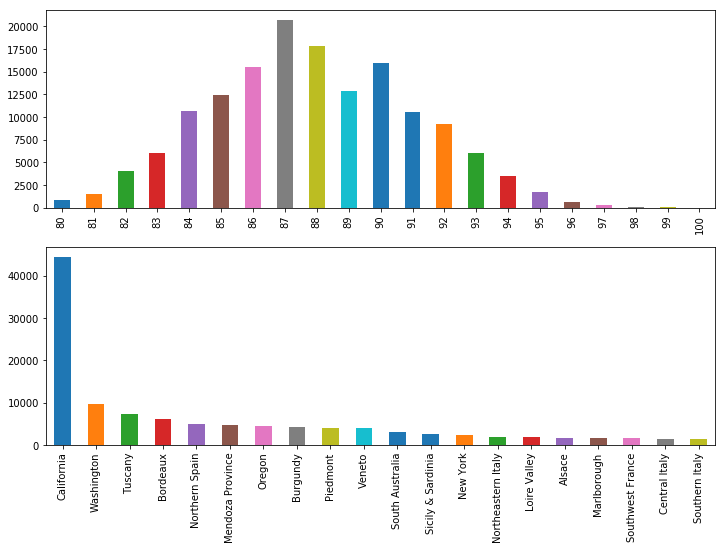

In [11]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

No tenemos por qué limitarnos solo a 1 columna, se puede elegir la configuración que se desee.

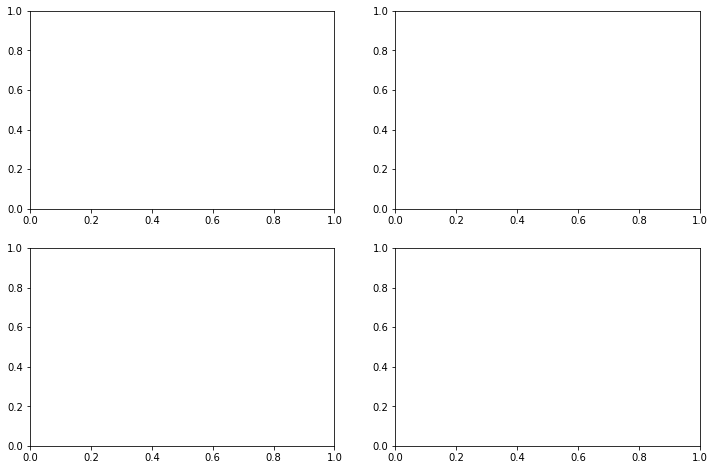

In [12]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

La unica diferencia es que el array de ejes es ahora bidimensional

In [13]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC22128>,
      dtype=object)

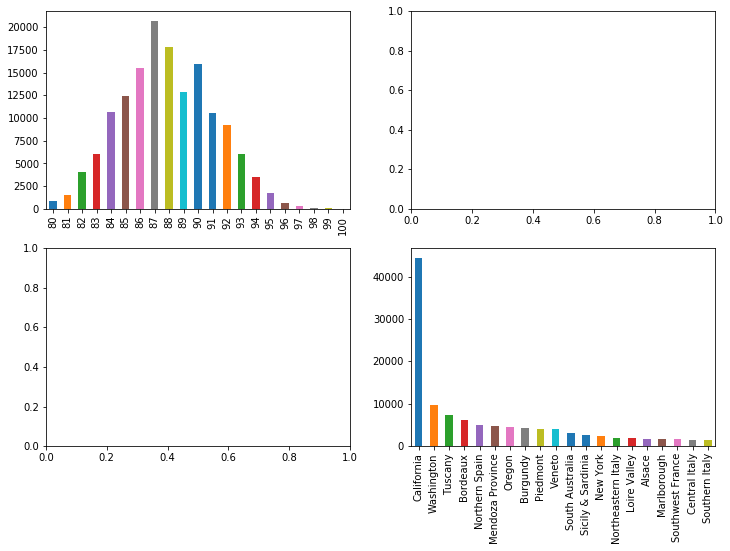

In [14]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
)

Esto permite crear paneles en los que se pueda visualizar información diversa en una sola imagen.

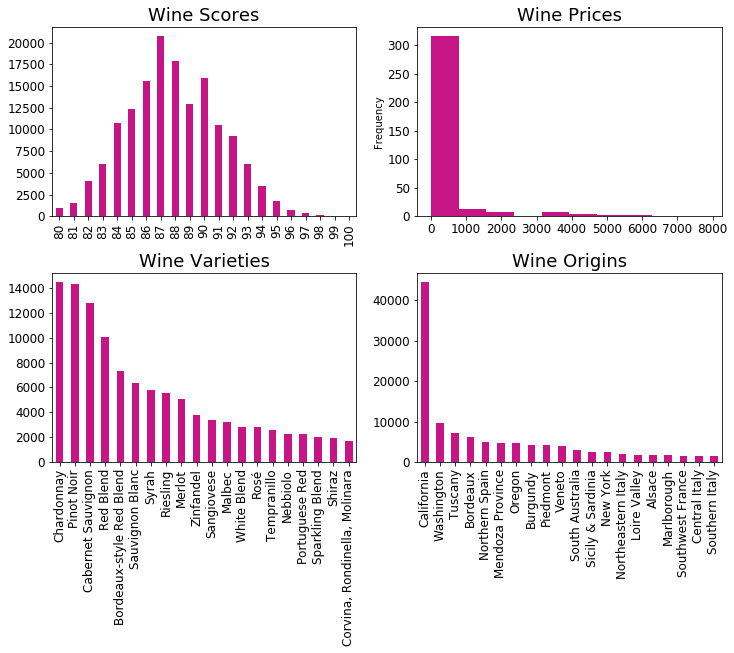

In [15]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

## ¿Para que se consideran útiles los subplots?

Muchas veces, en el proceso de visualizacion exploratoria se crean numerosos gráficos simples para ir comprobando determinadas características de un vistazo. Por ejemplo: comparar puntuaciones de los vinos más populares con los vinos menos conocidos.
En estos casos, esta técnica nos permite combinar dos gráficas en una única "unidad visual" para análisis y discusión.

Es lo que se conoce como paneles de información, de los que veremos más detalles en esta asignatura.

Por último, los subplots permiten emplear una técnica conocida como "facetting". Con esto se refiere a repartir variables de datos a lo largo de diferentes subplots y combinarlos en una única imágen o rejilla.

Veremos cómo podemos hacer esto de manera aún más sencilla en la siguiente parte del tutorial.